In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header= None)
df_train.shape

(60000, 785)

In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header= None)
df_test.shape

(10000, 785)

In [4]:
28*28 

784

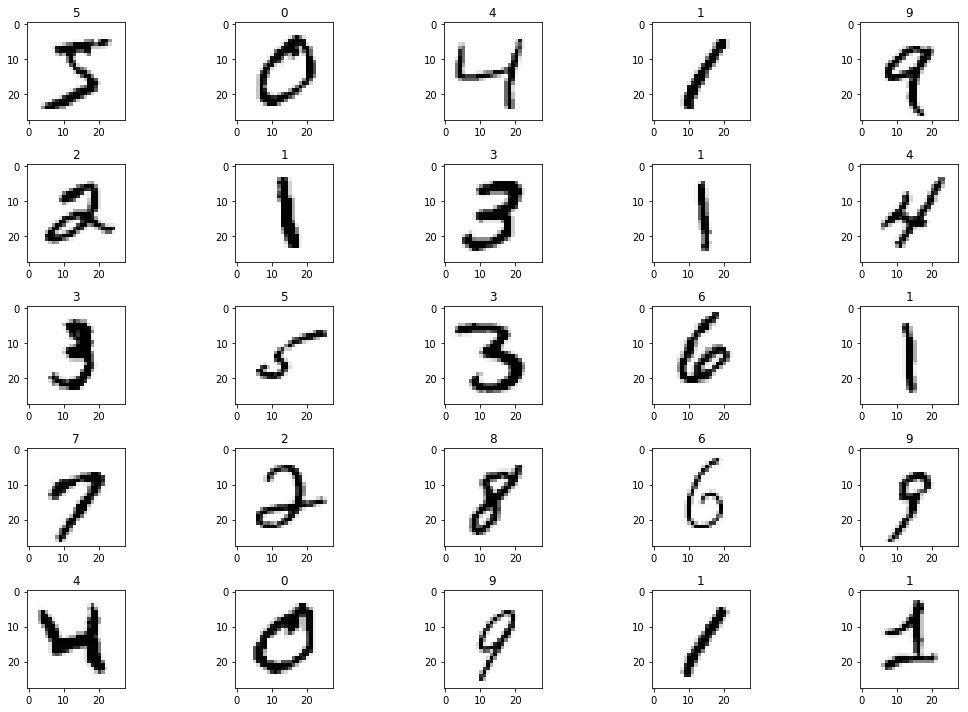

In [5]:
fig, axes = plt.subplots(5, 5, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(df_train.iloc[i, 1:].values.reshape(28, -1), cmap="Greys")
    ax.set_title(df_train.iloc[i, 0])

plt.tight_layout()

In [6]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]


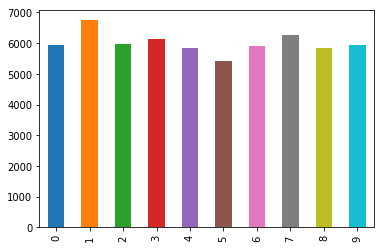

In [7]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

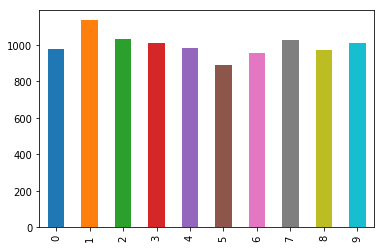

In [8]:
pd.Series(y_test).value_counts().sort_index().plot.bar()

In [12]:
from sklearn import preprocessing
import numpy as np

In [13]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train.astype(np.float64))
X_test_std = scaler.transform(X_test.astype(np.float64))

In [ ]:
%%time
est = linear_model.SGDClassifier(tol=1e-5, max_iter=1000)
est.fit(X_train_std, y_train)
print("accuracy", est.score(X_test_std, y_test))